<a href="https://colab.research.google.com/github/Bob-Gohardani/Machine-Learning/blob/main/random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# Random Forest Classifier with Feature Importance
Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict whether a person makes over 50K a year, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
data = '/kaggle/input/income-classification/income_evaluation.csv'

df = pd.read_csv(data)

In [ ]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings

- We can see that the dataset contains 9 character variables and 6 numerical variables.

- `income` is the target variable.

- There are no missing values in the dataset.

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- The above `df.describe()` command presents statistical properties in vertical form.

#### Useful commands to detect missing values 

- **df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.

- **df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.

- **df.isnull().sum().sum()**

It returns total number of missing values in the dataframe.


- **df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


- **df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

In [ ]:
# check for missing values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

In [ ]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

### 4.9 Functional approach to EDA <a class="anchor" id="4.9"></a>

- An alternative approach to EDA is to write a function that presents initial EDA of dataset.

- We can write such a function as follows :-

In [ ]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


In [ ]:
initial_eda(df)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64    

### Types of variables

- In this section, I segregate the dataset into categorical and numerical variables. 
- There are a mixture of categorical and numerical variables in the dataset. 
- Categorical variables have data type object. Numerical variables have data type int64.

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


- There are 9 categorical variables in the dataset.

- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.

- `income` is the target variable.

Frequency distribution of categorical variables 

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

#### Explore `income` target variable 

In [ ]:
# check for missing values

df['income'].isnull().sum()

0

We can see that there are no missing values in the `income` target variable.

In [ ]:
# view number of unique values

df['income'].nunique()

2

There are 2 unique values in the `income` variable.

In [ ]:
# view the unique values

df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

The two unique values are `<=50K` and `>50K`.

In [ ]:
# view the frequency distribution of values

df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
# view percentage of frequency distribution of values

df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

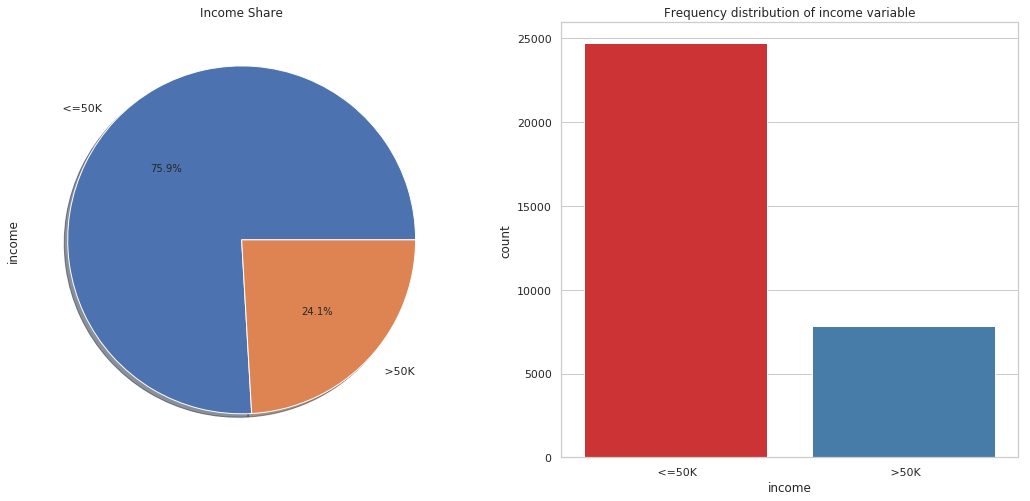

In [ ]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

#### Visualize `income` and `sex` variables

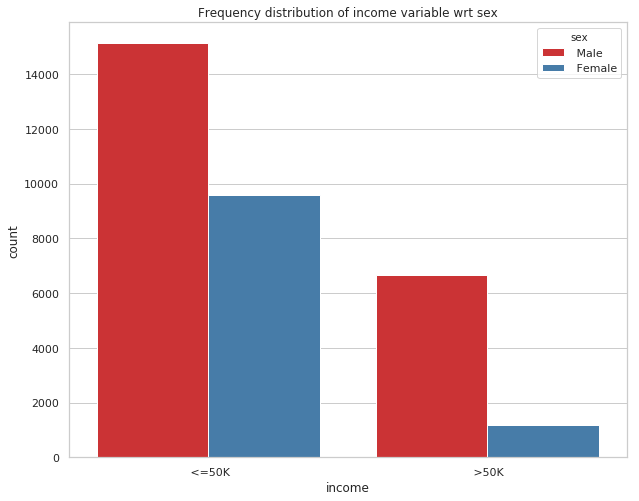

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

In [ ]:
# check number of unique labels 

df.workclass.nunique()

9

In [ ]:
# view the unique labels

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# view frequency distribution of values

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [ ]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace(' ?', np.NaN, inplace=True)

In [ ]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

- Now, we can see that there are no values encoded as `?` in the workclass variable.

- I will adopt similar approach with `occupation` and `native_country` column.

#### Visualize `workclass` variable

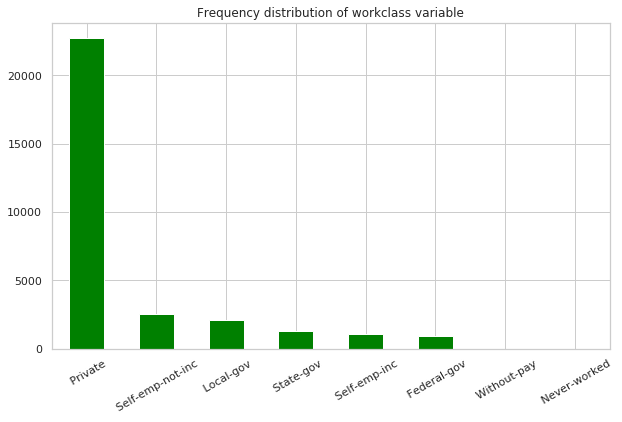

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

#### Visualize `workclass` variable wrt `income` variable

#### Visualize `workclass` variable wrt `sex` variable

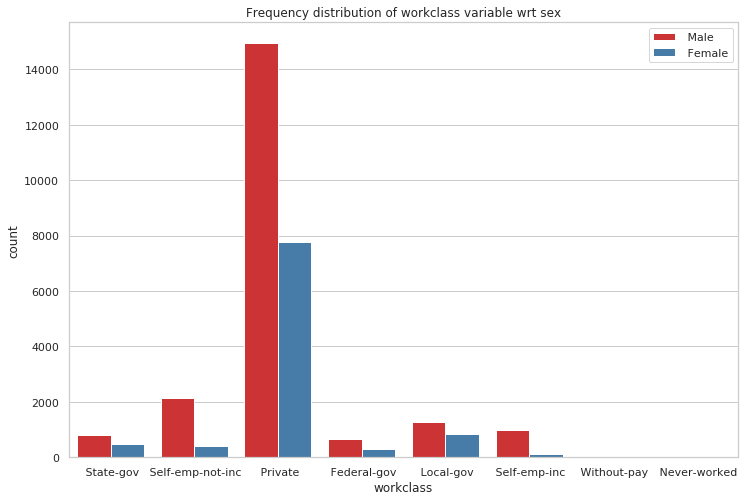

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

#### Explore `occupation` variable

In [ ]:
# check number of unique labels

df.occupation.nunique()

15

In [ ]:
# view unique labels

df.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
# view frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# replace '?' values in occupation variable with `NaN`
df['occupation'].replace(' ?', np.NaN, inplace=True)

In [ ]:
# again check the frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

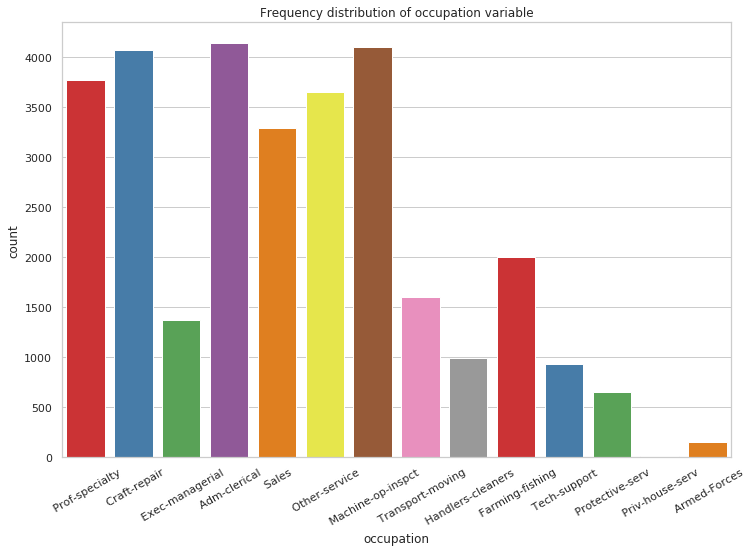

In [ ]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

#### Explore `native_country` variable

In [ ]:
# check number of unique labels

df.native_country.nunique()

42

In [ ]:
# view unique labels 

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
# check frequency distribution of values

df.native_country.value_counts()


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [ ]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

In [ ]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### 6.4 Check missing values in numerical variables 

In [ ]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that there are no missing values in the numerical variables.

#### Explore `age` variable

In [ ]:
df['age'].nunique()

73

#### View the distribution of `age` variable

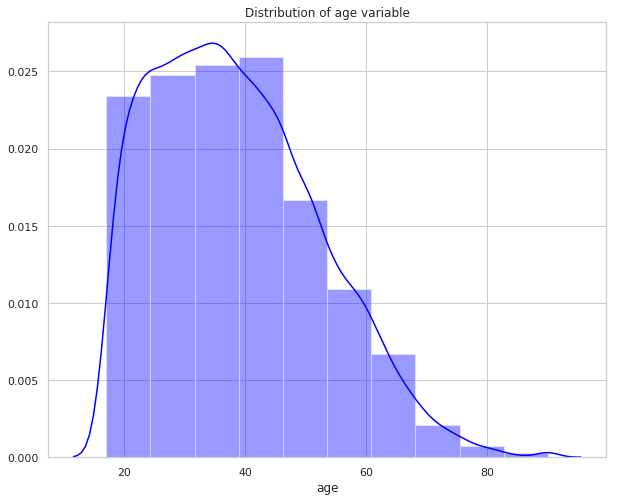

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

We can see that `age` is slightly positively skewed.

#### Detect outliers in `age` variable with boxplot

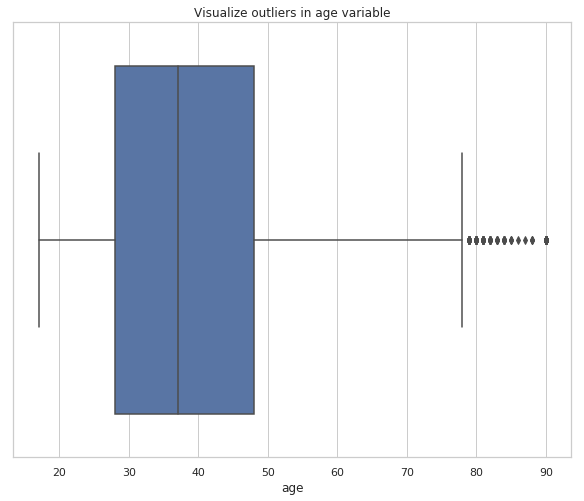

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

#### Explore relationship between `age` and `income` variables

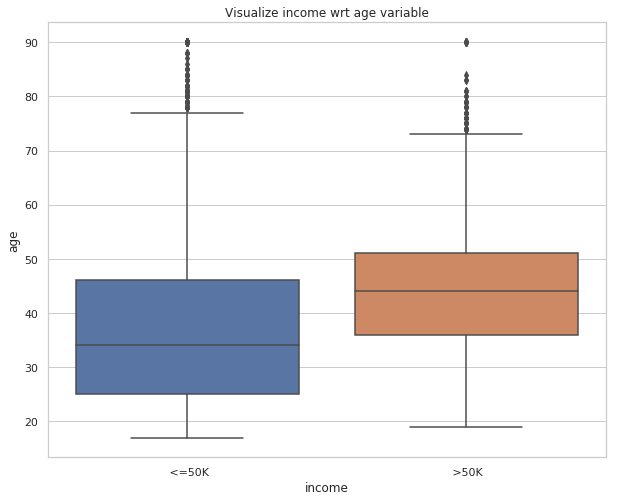

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#### Interpretation

- As expected, younger people make less money as compared to seniors.

#### Interpretation

- Senior people make more money than younger people.

#### Visualize relationship between `race` and `age`

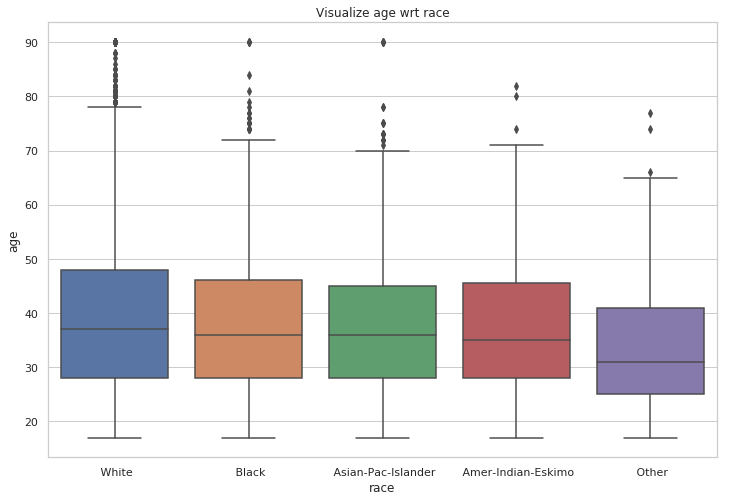

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Visualize age wrt race")
plt.show()

#### Interpretation

- Whites are more older than other groups of people.

#### Find out the correlations

In [ ]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


#### Interpretation

- We can see that there is no strong correlation between variables.

Declare feature vector and target variable

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## Feature Engineering  

- **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. 

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

### Encode categorical variables


In [ ]:
# preview categorical variables in X_train

X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [ ]:
# import OneHotEncoder
import category_encoders as ce

In [ ]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(22792, 105)

Similarly, I will take a look at the X_test set.

In [ ]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape

(9769, 105)

### Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

Random Forest Classifier model with default parameters

In [ ]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8446


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

Random Forest Classifier model with 100 Decision Trees

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8521


The model accuracy score with 10 decision-trees is 0.8446 but the same with 100 decision-trees is 0.8521. So, as expected accuracy increases with number of decision-trees in the model.

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt               0.159772
age                  0.149074
capital_gain         0.091299
hours_per_week       0.086339
education_num        0.065130
                       ...   
native_country_16    0.000028
occupation_14        0.000015
native_country_35    0.000009
workclass_8          0.000008
native_country_41    0.000000
Length: 105, dtype: float64

We can see that the most important feature is `fnlwgt` and least important feature is `native_country_41`.

Visualize feature scores of the features

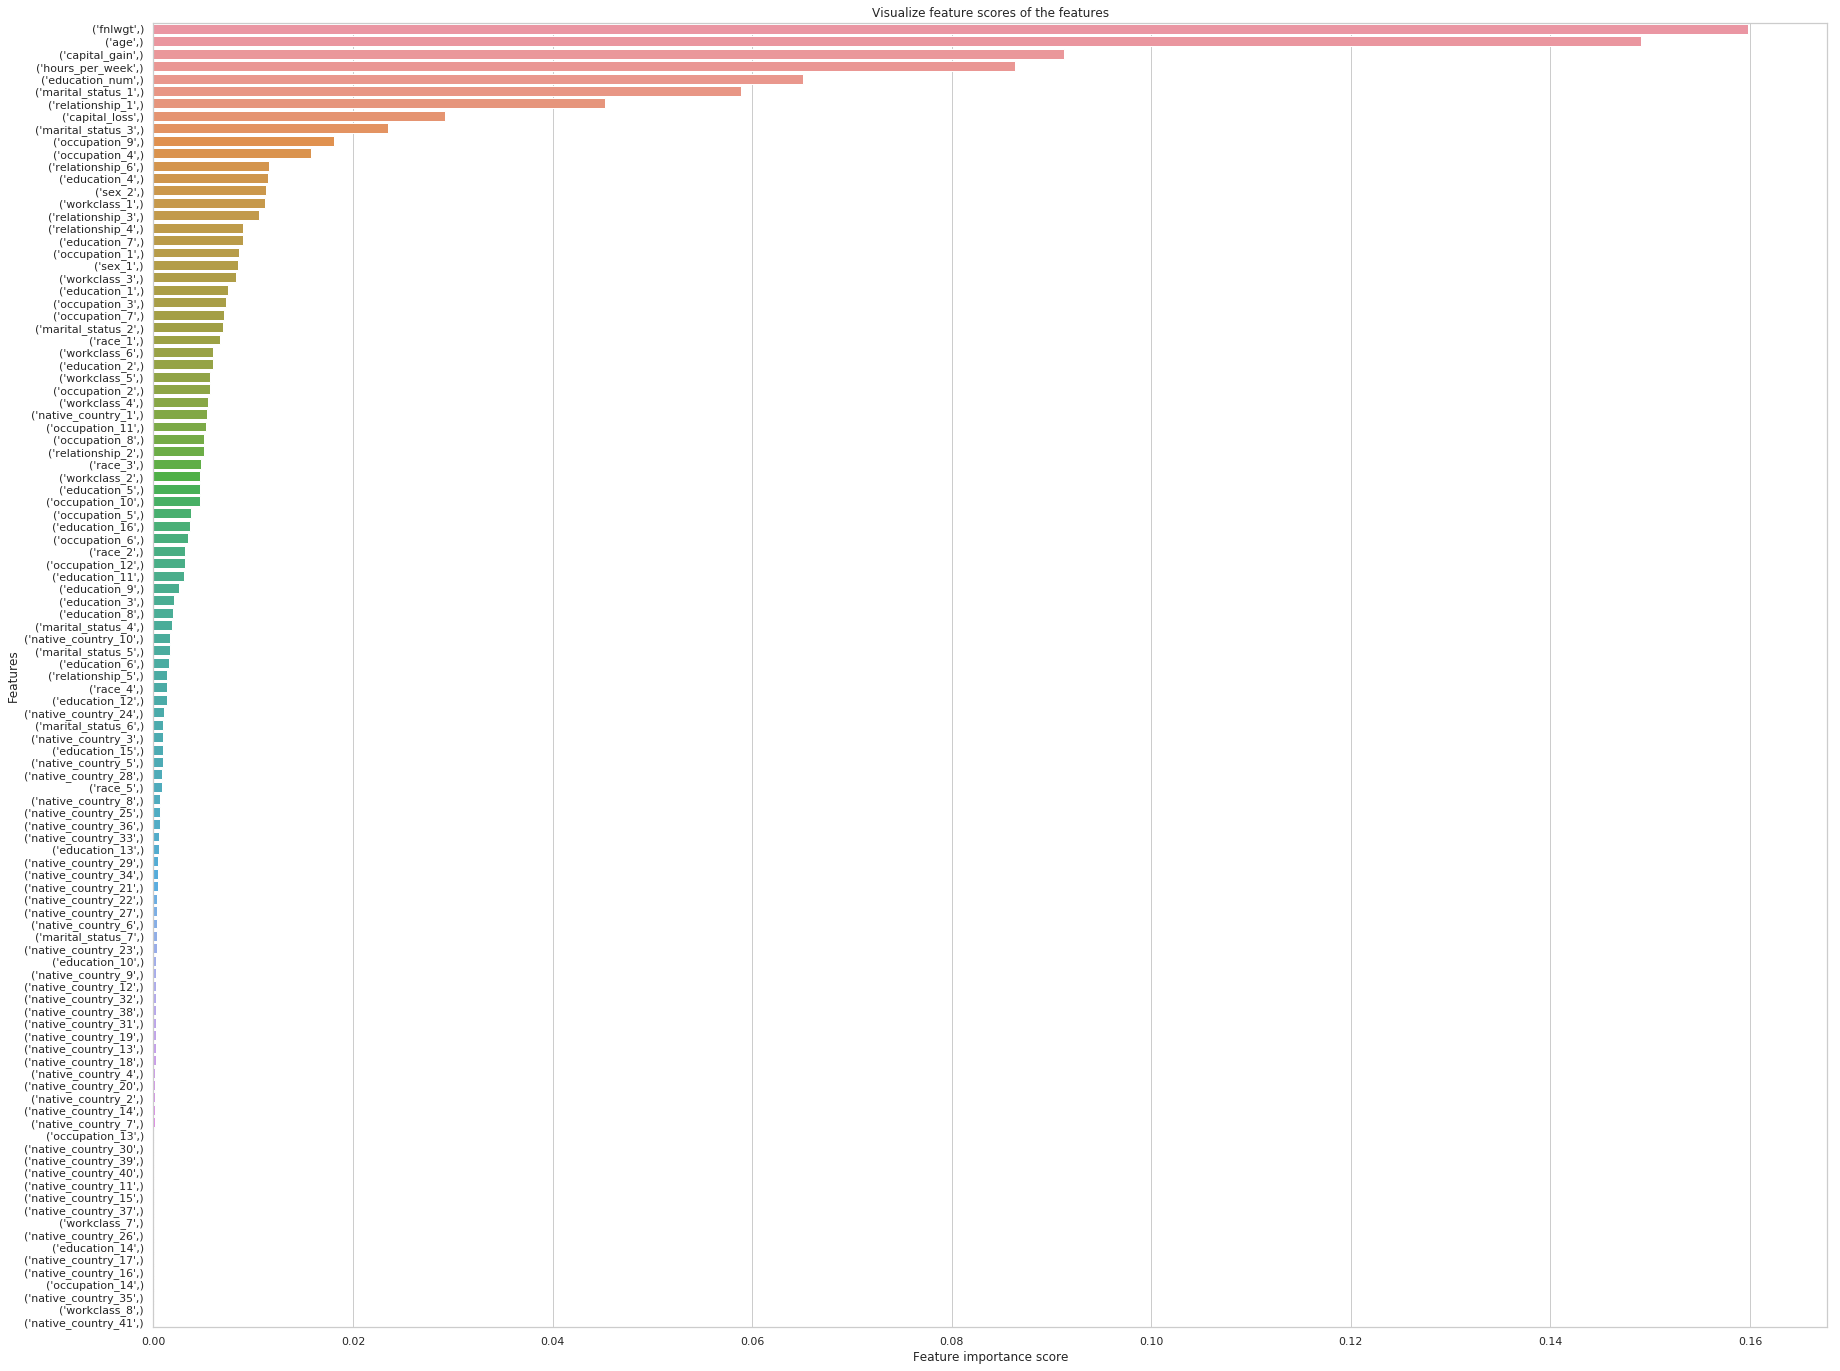

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()


Build the Random Forest model on selected features

In [ ]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['native_country_41'], axis=1)
X_test = X_test.drop(['native_country_41'], axis=1)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with native_country_41 variable removed : 0.8544


#### Interpretation

- I have removed the `native_country_41` variable from the model, rebuild it and checked its accuracy. 

- The accuracy of the model now comes out to be 0.8544. 

- The accuracy of the model with all the variables taken into account is 0.8521. 

- So, we can see that the model accuracy has been improved with `native_country_41` variable removed from the model.

Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6867  540]
 [ 882 1480]]


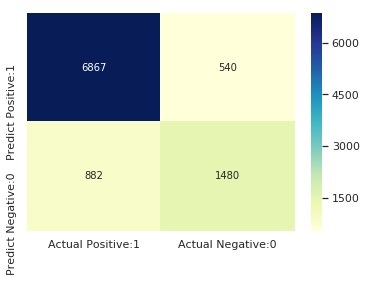

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')